# Linear Regression

This notebook is intended to introduce you to running ipython notebook and to familiarize you with some basics of numpy, matplotlib, and sklearn, which you'll use extensively in this course. Read through the commands, try making changes, and make sure you understand how the plots below are generated.

You should focus on making your code as readable as possible. Use lots of comments -- see the code below -- and try to prefer clarity over compact code.

You should also familiarize yourself with the various keyboard shortcuts for moving between cells and running cells. Ctrl-ENTER runs a cell, while shift-ENTER runs a cell and advances focus to the next cell.

The first code cell just contains setup calls -- importing libraries and some other global settings to make things run smoothly.

### Loading packages

In [1]:
# Import a bunch of libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

### Loading data
Using pandas we import the data from a csv-file.

In [2]:
data = pd.read_csv('LinRegData.csv')
print(data.head())

# Extract features X and ouput Y
Y = data['output']
X = data.values
X = X[:,:-1]

# Make train and test data
m = X.shape[0]
print('\n Number of samples:', m)
shuffle = np.random.permutation(np.arange(m))
X, Y = X[shuffle], Y[shuffle]
X_train = X[:int(m*0.6), :]
Y_train = Y[:int(m*0.6)]
X_dev = X[int(m*0.6):int(m*0.8), :]
Y_dev = Y[int(m*0.6):int(m*0.8)]
X_test = X[int(m*0.8):, :]
Y_test = Y[int(m*0.8):]                                

   feature0  feature1  feature2    output
0 -0.030438 -0.586283  3.371215  0.324861
1 -0.018274  0.508692 -3.773249  4.062470
2 -0.029183 -1.305260 -1.928349 -6.495241
3 -0.034172 -1.255773 -6.919072  2.040479
4  0.141417  1.280515 -4.702404  3.007641

 Number of samples: 200


### Plotting the data
To get an idea of the data, we plot the single features vs. the output.

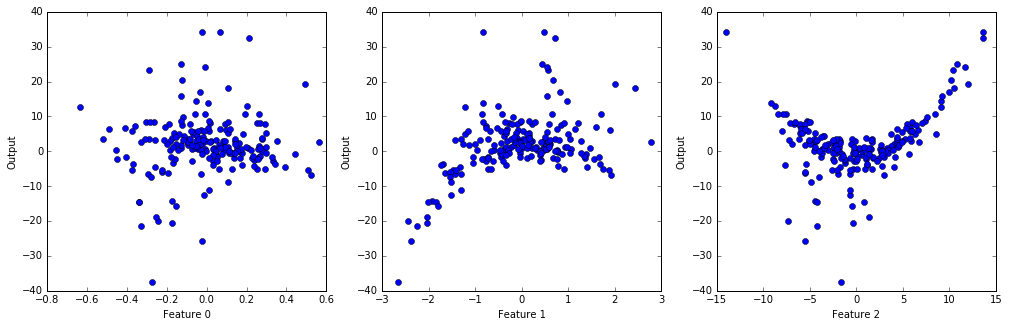

In [3]:
fig = plt.figure(figsize=(17,5))

ax1=fig.add_subplot(1,3,1)
ax1.plot(X[:,0],Y,'o')
ax1.set_xlabel('Feature 0')
ax1.set_ylabel('Output')

ax2=fig.add_subplot(1,3,2)
ax2.plot(X[:,1],Y,'o')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Output')

ax3=fig.add_subplot(1,3,3)
ax3.plot(X[:,2],Y,'o')
ax3.set_xlabel('Feature 2')
ax3.set_ylabel('Output')

plt.show()

To see how correlated the data are, we also plot features vs. features.

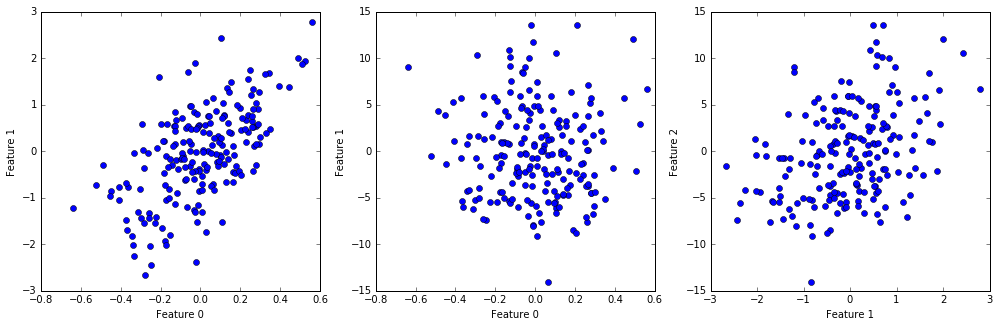

In [4]:
fig = plt.figure(figsize=(17,5))

ax1=fig.add_subplot(1,3,1)
ax1.plot(X[:,0],X[:,1],'o')
ax1.set_xlabel('Feature 0')
ax1.set_ylabel('Feature 1')

ax2=fig.add_subplot(1,3,2)
ax2.plot(X[:,0],X[:,2],'o')
ax2.set_xlabel('Feature 0')
ax2.set_ylabel('Feature 1')

ax3=fig.add_subplot(1,3,3)
ax3.plot(X[:,1], X[:,2],'o')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')

plt.show()

### Apply linear regression

In [5]:
# Try setting fit_intercept=False as well.
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, Y_train)
print('Intercept is: ', lr.intercept_)
print('Coefficients are: ', lr.coef_)
print('Estimated function: y = %.2f + %.2fx_0 + %.2fx_1 + %.2fx_2' 
      %(lr.intercept_, lr.coef_[0], lr.coef_[1], lr.coef_[2]))
approx_function = lambda x: lr.intercept_ + np.dot(x,lr.coef_)

Intercept is:  0.77300369927
Coefficients are:  [-14.1108217    6.01620255   0.03227782]
Estimated function: y = 0.77 + -14.11x_0 + 6.02x_1 + 0.03x_2


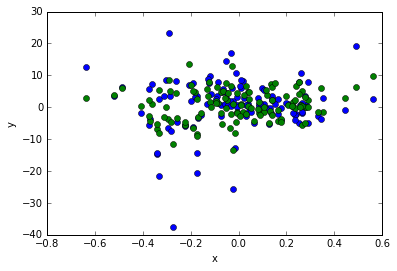

In [6]:
# Try plotting the different features vs. the output and vs. the prediction function
plt.plot(X_train[:,0], Y_train,'o')
plt.plot(X_train[:,0], approx_function(X_train),'o')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

We use the test set to check the performance of our regressor.

In [7]:
def RMSE(output, prediction):
    return np.sqrt(np.mean((output - prediction)**2))

prediction = approx_function(X_test)
# We use analogously the sklearn prediction function
prediction = lr.predict(X_dev)
RMSE(Y_dev, prediction)

10.234672314177335

### Scaling of the feature space


In [8]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# mean and variance are calculated using X_train (scaler.fit) , 
# then the scaling transformation is applied to X_train (scaler.transform)
print(scaler.mean_)
print(scaler.var_)
# for the test_data we want to use the same transformation as for the train_data,
# hence we apply here scaler.transform without scaler.fit
X_dev_scaled = scaler.transform(X_dev)

[-0.00989199 -0.03425671  0.0969201 ]
[  0.05063859   1.02678048  19.93065894]


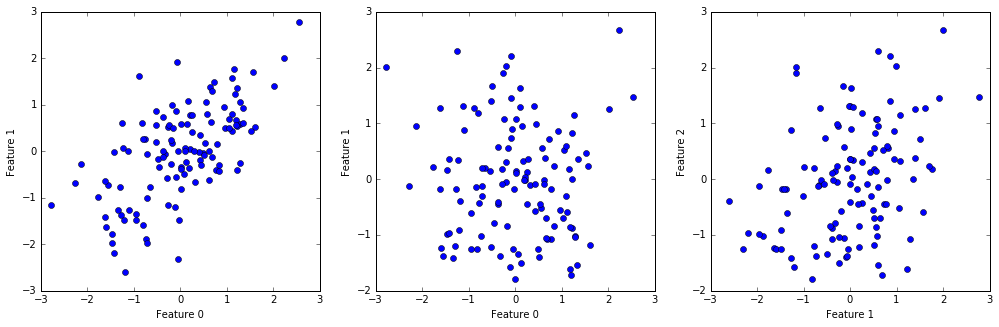

In [9]:
fig = plt.figure(figsize=(17,5))

ax1 = fig.add_subplot(1,3,1)
ax1.plot(X_train_scaled[:,0],X_train_scaled[:,1],'o')
ax1.set_xlabel('Feature 0')
ax1.set_ylabel('Feature 1')

ax2 = fig.add_subplot(1,3,2)
ax2.plot(X_train_scaled[:,0],X_train_scaled[:,2],'o')
ax2.set_xlabel('Feature 0')
ax2.set_ylabel('Feature 1')

ax3 = fig.add_subplot(1,3,3)
ax3.plot(X_train_scaled[:,1], X_train_scaled[:,2],'o')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')

plt.show()

In [10]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_scaled, Y_train)
predictions = lr.predict(X_dev_scaled)
error = RMSE(Y_dev, predictions)
print(error)

10.2346723142


### Feature engineering 
In some of the plots we suspect a non-linear relationship between the feature and the output. Hence we try adding degrees of the features as additional features.

In [11]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
A = np.ones((5,2))
A[:,1] = range(5)
print(A)
print(poly.fit_transform(A))

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]]
[[  1.   0.   1.   0.   0.]
 [  1.   1.   1.   1.   1.]
 [  1.   2.   1.   2.   4.]
 [  1.   3.   1.   3.   9.]
 [  1.   4.   1.   4.  16.]]


In [12]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled_d2 = poly.fit_transform(X_train_scaled)
X_dev_scaled_d2 = poly.fit_transform(X_dev_scaled)

lr = LinearRegression()
lr.fit(X_train_scaled_d2, Y_train)
predictions = lr.predict(X_dev_scaled_d2)
error = RMSE(Y_dev, predictions)
print(error)

2.28388895728


10.2346723142
2.28388895728
1.13995175395
1.82955053174
13.382241461
86.5447864814


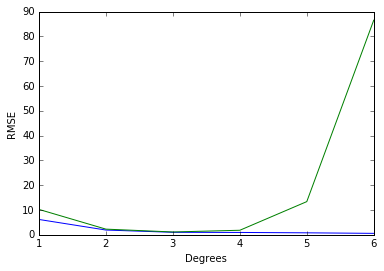

In [13]:
error_vec_train = []
error_vec_dev = []
for i in range(1,7):
    poly = preprocessing.PolynomialFeatures(degree=i, include_bias=False)
    X_train_scaled_d2 = poly.fit_transform(X_train_scaled)
    X_dev_scaled_d2 = poly.fit_transform(X_dev_scaled)

    lr = LinearRegression(fit_intercept=True)
    lr.fit(X_train_scaled_d2, Y_train)
    predictions = lr.predict(X_dev_scaled_d2)
    error_dev = RMSE(Y_dev, predictions)
    error_train = RMSE(Y_train, lr.predict(X_train_scaled_d2))
    print(error_dev)
    error_vec_train.append(error_train)
    error_vec_dev.append(error_dev)
plt.plot(range(1,7), error_vec_train)
plt.plot(range(1,7), error_vec_dev)
plt.xlabel("Degrees")
plt.ylabel("RMSE")
plt.show()

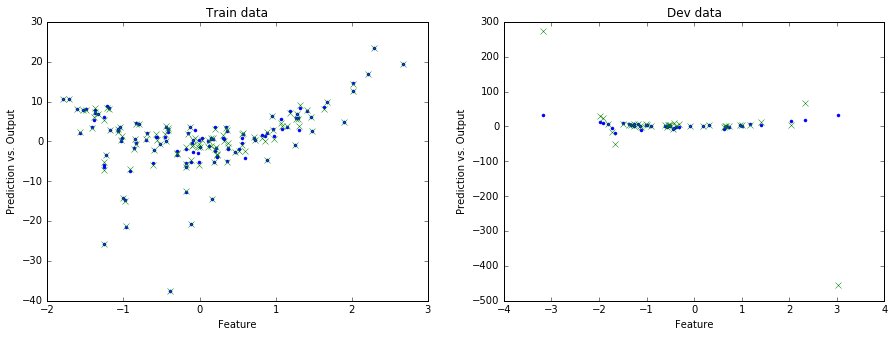

In [14]:
# Let's see what's going wrong with too many degrees
feature = 2
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X_train_scaled[:,feature],Y_train,'.')
ax1.plot(X_train_scaled[:,feature],lr.predict(X_train_scaled_d2) ,'x')
ax1.set_title("Train data")
ax1.set_xlabel("Feature")
ax1.set_ylabel("Prediction vs. Output")

ax2 = fig.add_subplot(1,2,2)
ax2.plot(X_dev_scaled[:,feature],Y_dev,'.')
ax2.plot(X_dev_scaled[:,feature],lr.predict(X_dev_scaled_d2) ,'x')
ax2.set_title("Dev data")
ax2.set_xlabel("Feature")
ax2.set_ylabel("Prediction vs. Output")

plt.show()